#K-Nearest Neighbor(KNN) - BMW Car Sales Classification
**Brief:** KNN is a simple, instance-based supervised learning algorithm used for classification (and regression). It predicts a sample's label by majority vote of its k nearest neighbors in feature space.

Using the BMW car sales dataset, we will implement a KNN classifier to predict sales classification (e.g., sold/not sold or high/low) based on various car features.

###Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

###Loading Dataset

In [2]:
# Load the dataset
df = pd.read_csv("7.BMW_Car_Sales_Classification.csv")

### Basic Data Exploration

In [3]:
df.head() #first 5 rows

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [4]:
df.shape #number of rows and columns

(50000, 11)

In [5]:
df.info() #datatypes, null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [6]:
#summarize stats (min, max, count)
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


### Exploratory Data Analysis (EDA)

In [7]:
#check for missing values
df.isnull().sum()

,0
Model,0
Year,0
Region,0
Color,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0
Mileage_KM,0
Price_USD,0
Sales_Volume,0


In [8]:
#check for duplicate values
df.duplicated().sum()

np.int64(0)

Unique Target Values: ['High' 'Low']

Class Distribution:

Sales_Classification
Low     34754
High    15246
Name: count, dtype: int64


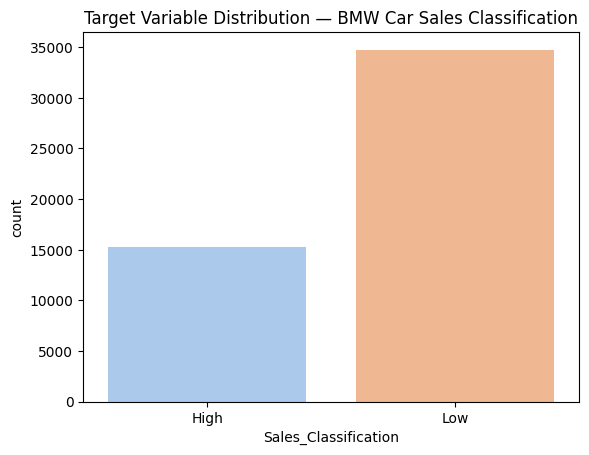

In [9]:
#target value distribution
target = 'Sales_Classification'

print("Unique Target Values:", df[target].unique())
print("\nClass Distribution:\n")
print(df[target].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x=target, palette="pastel")
plt.title("Target Variable Distribution — BMW Car Sales Classification")
plt.show()

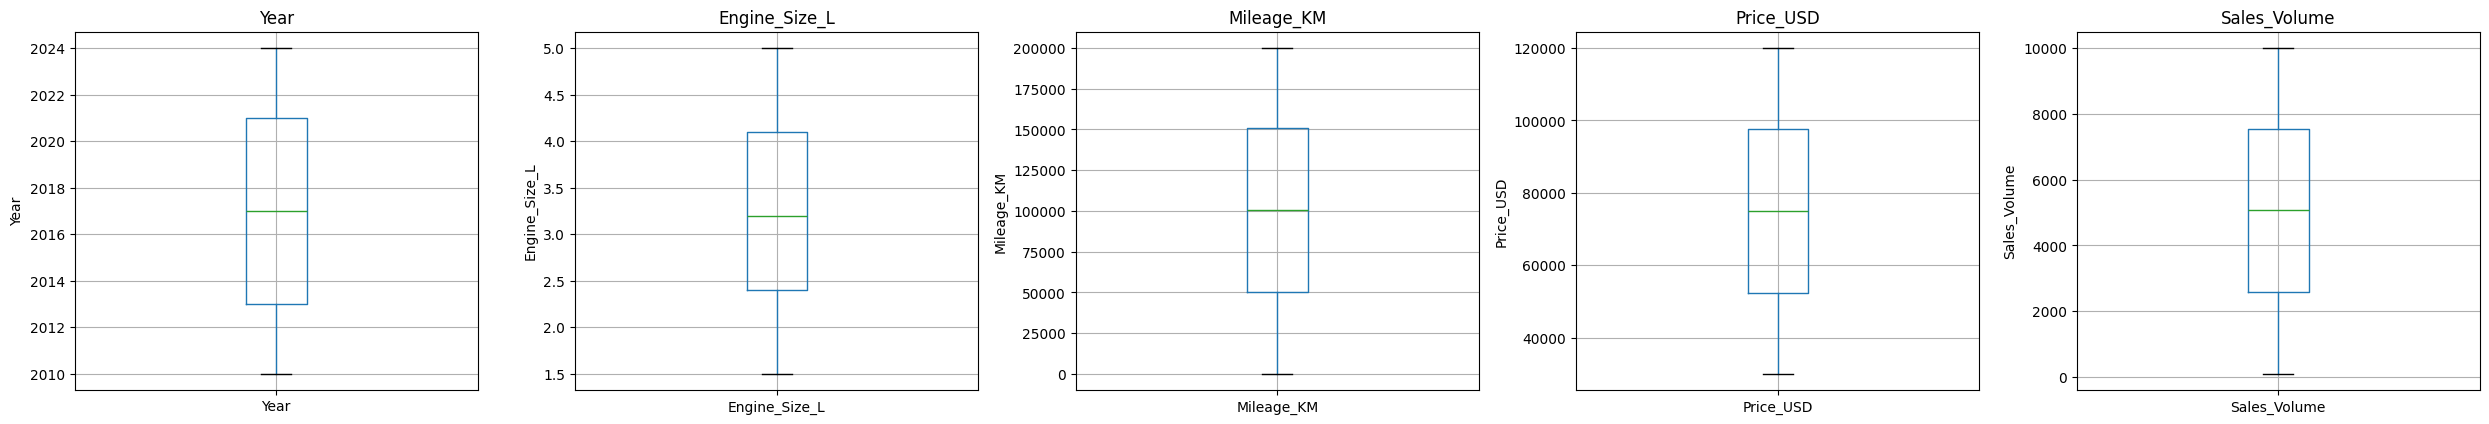

In [10]:
#Checking For Outliers
plt.figure(figsize=(25, 20))
num_cols = df.select_dtypes(include=np.number).columns

for i, column in enumerate(num_cols):
    plt.subplot(5, 5, i + 1)
    df.boxplot(column=column)
    plt.title(column)
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [11]:
#no outliers

Numeric Columns: ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']


,count,mean,std,min,25%,50%,75%,max
Year,50000.0,2017.01570,4.324459,2010.0,2013.00,2017.0,2021.00,2024.0
Engine_Size_L,50000.0,3.24718,1.009078,1.5,2.40,3.2,4.10,5.0
Mileage_KM,50000.0,100307.20314,57941.509344,3.0,50178.00,100388.5,150630.25,199996.0
Price_USD,50000.0,75034.60090,25998.248882,30000.0,52434.75,75011.5,97628.25,119998.0
Sales_Volume,50000.0,5067.51468,2856.767125,100.0,2588.00,5087.0,7537.25,9999.0


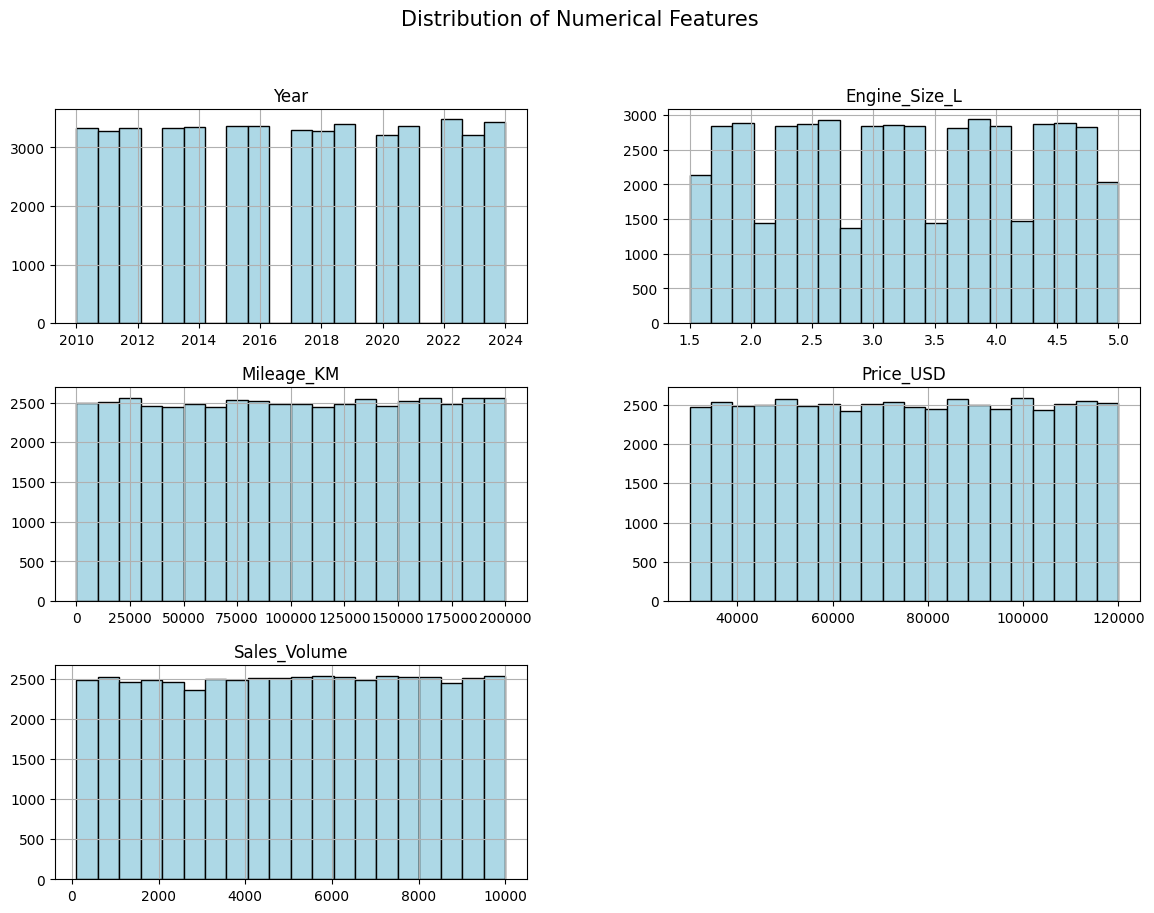

In [12]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print("Numeric Columns:", num_cols)

display(df[num_cols].describe().T)

# Distribution plots
df[num_cols].hist(figsize=(14,10), bins=20, color='lightblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=15)
plt.show()

Categorical Columns: ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission']


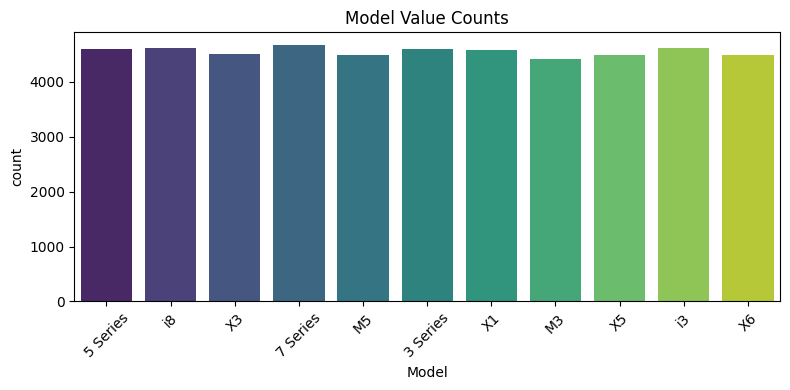

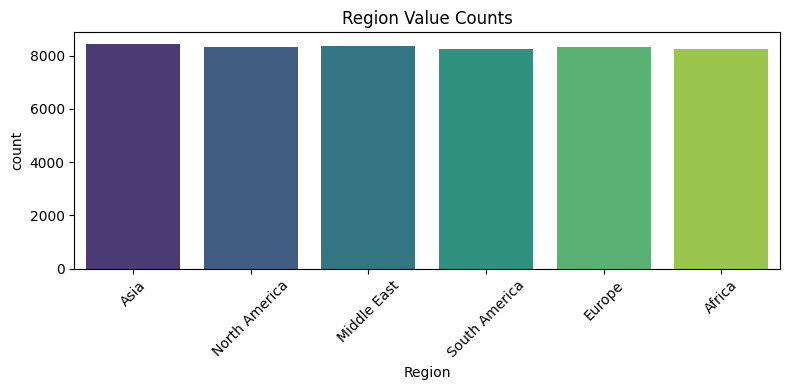

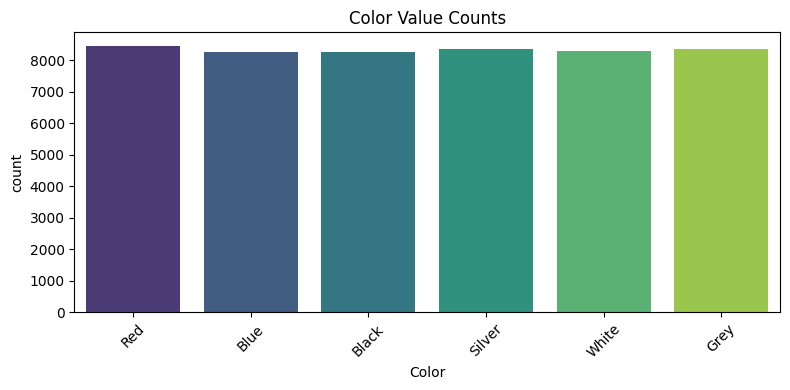

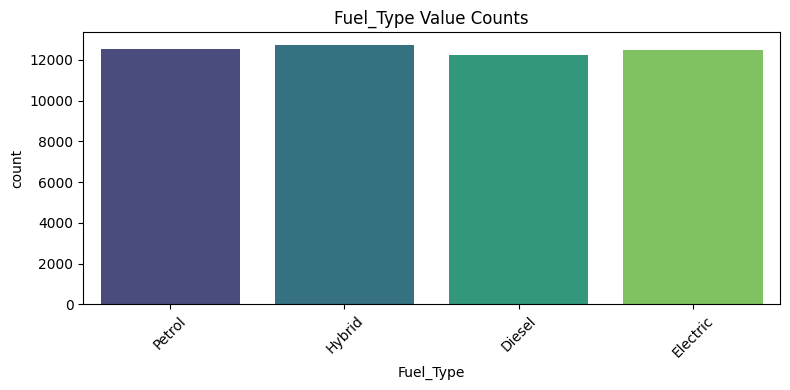

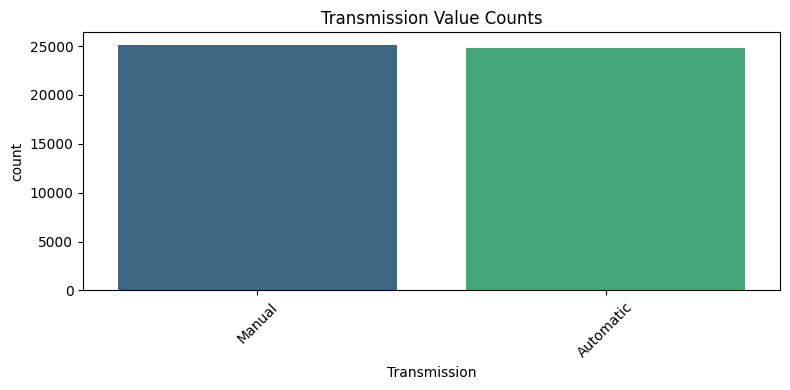

In [14]:
catd_cols = df.select_dtypes(include=['object']).columns.tolist()
catd_cols.remove('Sales_Classification')  # remove target

print("Categorical Columns:", catd_cols)

for col in catd_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f"{col} Value Counts")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

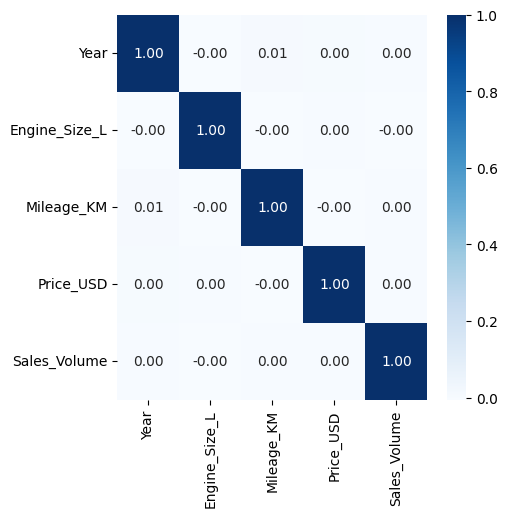

In [15]:
#Plotting Correlation

num_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(5,5))
sns.heatmap(num_cols.corr(),annot=True,fmt='.2f',cmap='Blues')
plt.show()

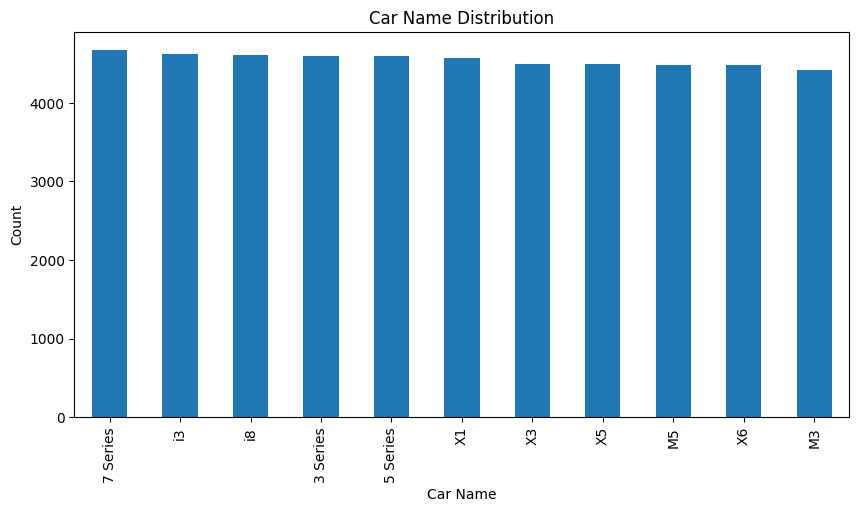

In [16]:
df['Model'].value_counts().plot(kind='bar',figsize=(10,5))
plt.title('Car Name Distribution')
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.show()

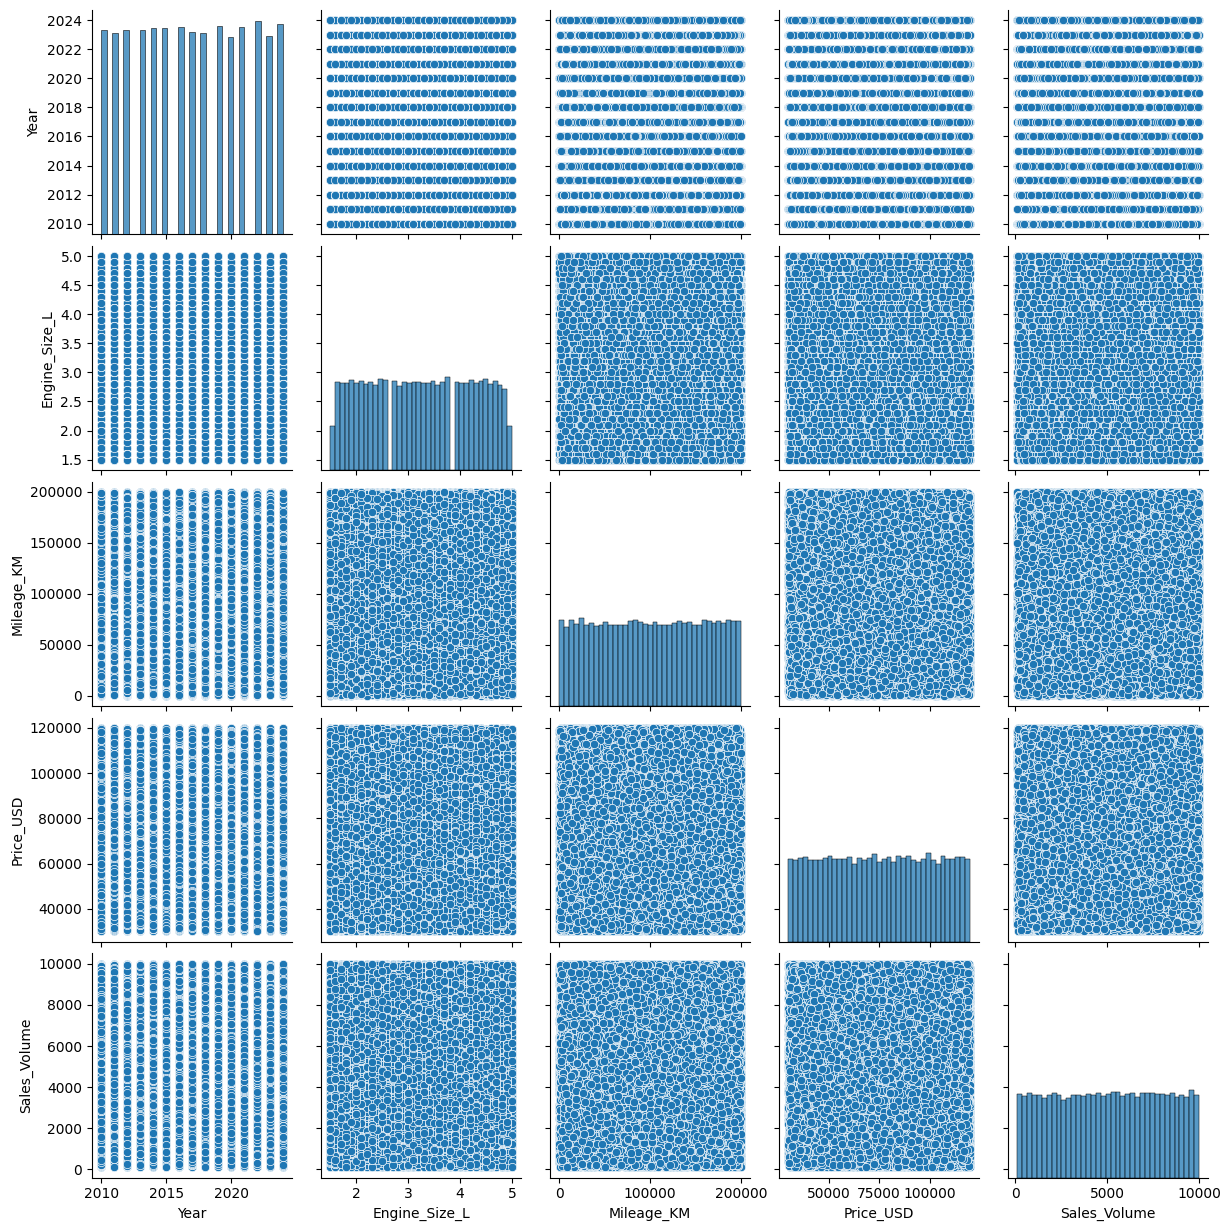

In [17]:
# Data Visualization Through Pairplot
sns.pairplot(df)
plt.show()

###Data Preprocessing

In [18]:
#Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [19]:
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,1,2016,1,3,3,1,3.5,151748,98740,8300,0
1,10,2013,4,3,2,0,1.6,121671,79219,3428,1
2,1,2022,4,1,3,0,4.5,10991,113265,6994,1
3,6,2024,3,1,3,0,1.7,27255,60971,4047,1
4,2,2020,5,0,0,1,2.1,122131,49898,3080,1


In [20]:
#train test split
from sklearn.model_selection import train_test_split
X = df.drop('Sales_Classification',axis=1)
y = df['Sales_Classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###Model Training

KNN Model Accuracy: 93.71%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      3032
           1       0.96      0.95      0.95      6968

    accuracy                           0.94     10000
   macro avg       0.92      0.93      0.93     10000
weighted avg       0.94      0.94      0.94     10000



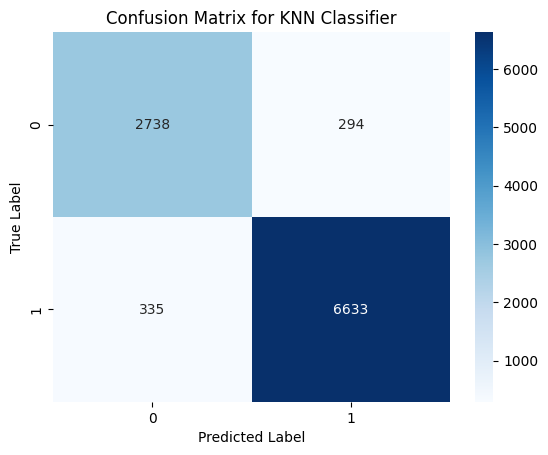

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize KNN with a default k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Model Accuracy: {accuracy*100:.2f}%")

# Detailed performance metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

###Hyperparameter Tuning (Finding Best k)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_dist = {
    'n_neighbors': np.arange(1, 16),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize model
knn = KNeighborsClassifier()

# Randomized Search with 5-fold CV
random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist,
    n_iter=10,        # how many random combinations to test
    cv=3,             # 3-fold cross-validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Display best parameters
print("🔹 Best Parameters Found:")
print(random_search.best_params_)

# Extract best k
best_k = random_search.best_params_['n_neighbors']
print(f"\n✅ Best k value found: {best_k}")

# Evaluate final model
best_knn = random_search.best_estimator_
y_pred_best = best_knn.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"\n🏁 Final KNN Test Accuracy: {accuracy_score(y_test, y_pred_best)*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix (Best K={best_k})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

🔹 Best Parameters Found:
{'weights': 'distance', 'n_neighbors': np.int64(13), 'metric': 'manhattan'}

✅ Best k value found: 13


🏁 Final KNN Model Accuracy: 96.44%

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      3032
           1       0.97      0.98      0.97      6968

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



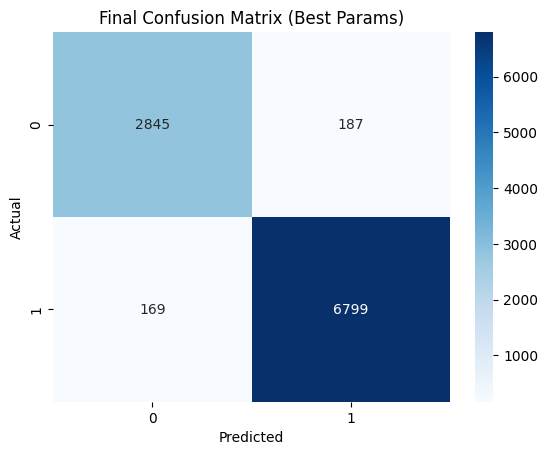

In [29]:
# Final Model Training with Best Parameters
best_knn = KNeighborsClassifier(
    n_neighbors=13,
    weights='distance',
    metric='manhattan'
)

best_knn.fit(X_train, y_train)
y_pred_final = best_knn.predict(X_test)

# Evaluation

print(f"🏁 Final KNN Model Accuracy: {accuracy_score(y_test, y_pred_final)*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Final Confusion Matrix (Best Params)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



## 🧾 **Results and Analysis**

| **Model Version** | **Accuracy** | **Precision (avg)** | **Recall (avg)** | **F1-Score (avg)** |
|:------------------|:-------------:|:-------------------:|:----------------:|:------------------:|
| Baseline KNN (k = 5) | 93.71 % | 0.94 | 0.94 | 0.94 |
| **Tuned KNN (k = 13, weights = distance, metric = manhattan)** | **96.44 %** | **0.96** | **0.96** | **0.96** |




## 🔹 **Key Observations**
- Accuracy improved from **93.71% → 96.44%** after hyperparameter tuning.  
- **Distance-based weighting** gave more importance to closer data points, improving predictions.  
- **Manhattan distance** performed better than Euclidean, likely due to mixed-scale numeric features.  
- Both classes are well-predicted with balanced precision and recall — no significant bias or overfitting observed.

## 🏁 **Conclusion**
The **K-Nearest Neighbors (KNN)** algorithm achieved excellent results for the **BMW Car Sales Classification** task.  
After applying **RandomizedSearchCV** for hyperparameter tuning, the model reached an impressive **96.44% accuracy** on the test set.  

Key takeaways:
- Data preprocessing and feature scaling were critical for stable performance.  
- Proper selection of `k`, distance metric, and weighting significantly improved results.  
- KNN, though simple, served as a strong and reliable baseline model for this classification problem.